warstwa rekurencyjna - poza standardowymi wejściami mamy jeszcze takie "zapetlenie"; to co wyszło z neuronu wchodzi do niego znowu
to co sieć wyprodukowała wchodzi do niej jeszcze raz - daje nam to pamięć; czyli sieć bierze pod uwagę to co robiła chwilę wcześniej a nie tylko to co dzieje się w teraźniejszym kroku 

* SimpleRNN - basic sieć rekurencyjna
* warstwa GRU - dorzuca się kolejne elementy w tej warstwie - nie neurony - tylko update i reset gate, które kontrolują jakie informacje są przechowywane i jakie są ignorowane
* warstwa LSTM (long short-term memory) - ona już sama ma komórkę pamięci; jedna komórka odpowiedzialna za zapamiętywanie 

In [1]:
#Na podstawie poprzedniego pliku stwórz 4 modele:
#1. z warstwą embedding
#2. z warstwą embedding i warstwą SimpleRNN (między embedding a dense), wyposażoną w 32 neurony
#3. z warstwą embedding i warstwą GRU (między embedding a dense), wyposażoną w 32 neurony
#4. z warstwą embedding i warstwą LSTM (między embedding a dense), wyposażoną w 32 neurony
#Dla każdego modelu stwórz wykresy. Która sieć poradziła sobie najlepiej?


In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
from tensorflow.keras.callbacks import EarlyStopping
n_words = 5000
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=n_words)

es = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)

EPOCHS = 1000

In [3]:

from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 100

X_train_pad = pad_sequences(X_train, maxlen=max_words, padding="post")
X_test_pad = pad_sequences(X_test, maxlen=max_words, padding="post")

In [4]:
from tensorflow.keras.layers import Embedding, Flatten


model = Sequential()
model.add(Embedding(input_dim = n_words, output_dim = 16, input_length = max_words))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_pad,y_train, epochs = EPOCHS, validation_data = (X_test_pad,y_test), callbacks = [es])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           80000     
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                102464    
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 182,529
Trainable params: 182,529
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
782/782 [==============================] - 3s 3ms/step - loss: 0.4451 - accuracy: 0.7737 - val_loss: 0.3507 - val_accuracy: 0.8436
Epoch 2/1000
782/782 [================

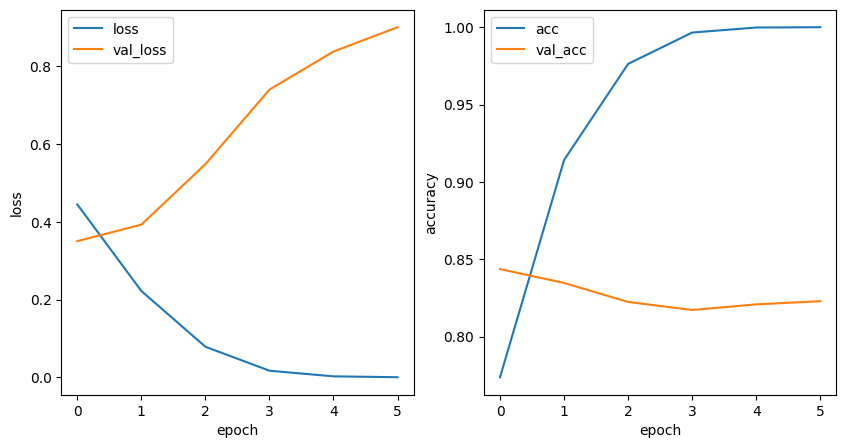

In [5]:
hist = pd.DataFrame(history.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(hist.loss, label = "loss")
plt.plot(hist.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.accuracy, label = "acc")
plt.plot(hist.val_accuracy, label = "val_acc")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()

In [6]:
from tensorflow.keras.layers import GRU, LSTM, SimpleRNN

In [7]:
model_gru = Sequential()
model_gru.add(Embedding(input_dim = n_words, output_dim = 16, input_length = max_words))
model_gru.add(GRU(32))
model_gru.add(Flatten())
model_gru.add(Dense(64, activation='relu'))
model_gru.add(Dense(1, activation='sigmoid'))
model_gru.summary()
model_gru.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           80000     
                                                                 
 gru (GRU)                   (None, 32)                4800      
                                                                 
 flatten_1 (Flatten)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 86,977
Trainable params: 86,977
Non-trainable params: 0
_________________________________________________________________


In [8]:
history_gru = model_gru.fit(X_train_pad,y_train, epochs = EPOCHS, validation_data = (X_test_pad,y_test), callbacks = [es])

Epoch 1/1000
782/782 [==============================] - 28s 32ms/step - loss: 0.4708 - accuracy: 0.7614 - val_loss: 0.3615 - val_accuracy: 0.8424
Epoch 2/1000
782/782 [==============================] - 25s 31ms/step - loss: 0.3015 - accuracy: 0.8734 - val_loss: 0.3439 - val_accuracy: 0.8514
Epoch 3/1000
782/782 [==============================] - 25s 31ms/step - loss: 0.2550 - accuracy: 0.8974 - val_loss: 0.3519 - val_accuracy: 0.8518
Epoch 4/1000
782/782 [==============================] - 24s 31ms/step - loss: 0.2219 - accuracy: 0.9119 - val_loss: 0.3663 - val_accuracy: 0.8482
Epoch 5/1000
782/782 [==============================] - 25s 32ms/step - loss: 0.1928 - accuracy: 0.9233 - val_loss: 0.4053 - val_accuracy: 0.8392
Epoch 6/1000
782/782 [==============================] - 25s 32ms/step - loss: 0.1719 - accuracy: 0.9333 - val_loss: 0.4151 - val_accuracy: 0.8370
Epoch 7/1000
782/782 [==============================] - 24s 31ms/step - loss: 0.1471 - accuracy: 0.9428 - val_loss: 0.5185 -

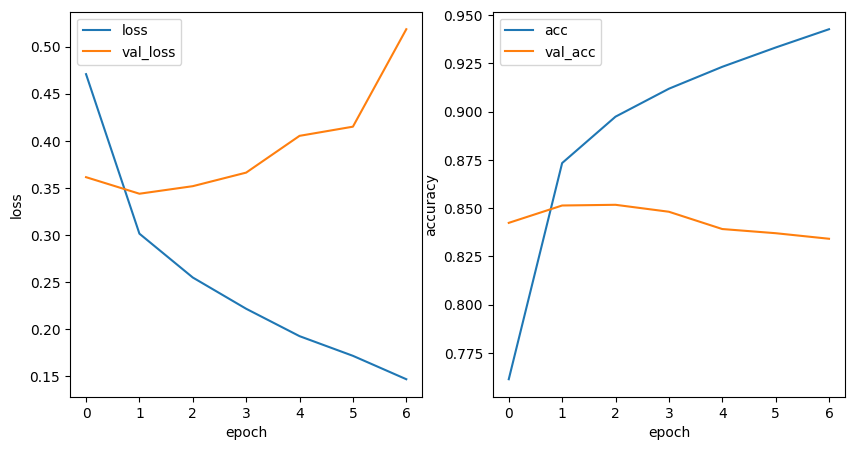

In [9]:
hist_gru = pd.DataFrame(history_gru.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(hist_gru.loss, label = "loss")
plt.plot(hist_gru.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist_gru.accuracy, label = "acc")
plt.plot(hist_gru.val_accuracy, label = "val_acc")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()

In [17]:
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim = n_words, output_dim = 16, input_length = max_words))
model_lstm.add(LSTM(32))
model_lstm.add(Flatten())
model_lstm.add(Dense(64, activation='relu'))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.summary()
model_lstm.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 16)           80000     
                                                                 
 lstm_2 (LSTM)               (None, 32)                6272      
                                                                 
 flatten_3 (Flatten)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 88,449
Trainable params: 88,449
Non-trainable params: 0
_________________________________________________________________


In [18]:
history_lstm = model_lstm.fit(X_train_pad,y_train, epochs = EPOCHS, validation_data = (X_test_pad,y_test), callbacks = [es])

Epoch 1/1000
782/782 [==============================] - 24s 27ms/step - loss: 0.4258 - accuracy: 0.7984 - val_loss: 0.3449 - val_accuracy: 0.8464
Epoch 2/1000
782/782 [==============================] - 21s 27ms/step - loss: 0.3012 - accuracy: 0.8752 - val_loss: 0.3649 - val_accuracy: 0.8376
Epoch 3/1000
782/782 [==============================] - 21s 27ms/step - loss: 0.2702 - accuracy: 0.8922 - val_loss: 0.3840 - val_accuracy: 0.8434
Epoch 4/1000
782/782 [==============================] - 21s 27ms/step - loss: 0.2489 - accuracy: 0.9025 - val_loss: 0.3897 - val_accuracy: 0.8415
Epoch 5/1000
782/782 [==============================] - 21s 26ms/step - loss: 0.2155 - accuracy: 0.9169 - val_loss: 0.4223 - val_accuracy: 0.8429
Epoch 6/1000
782/782 [==============================] - 21s 27ms/step - loss: 0.1883 - accuracy: 0.9288 - val_loss: 0.4059 - val_accuracy: 0.8421


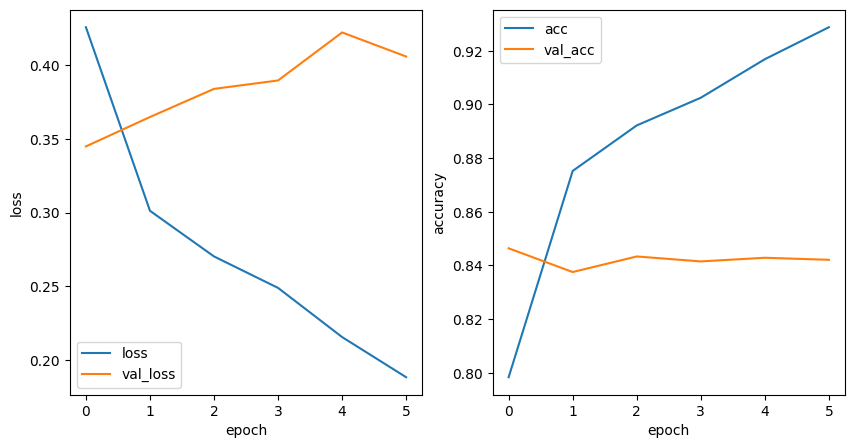

In [19]:
hist_lstm = pd.DataFrame(history_lstm.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(hist_lstm.loss, label = "loss")
plt.plot(hist_lstm.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist_lstm.accuracy, label = "acc")
plt.plot(hist_lstm.val_accuracy, label = "val_acc")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()

In [14]:
from tensorflow.keras.layers import SimpleRNN

model_rnn = Sequential()
model_rnn.add(Embedding(input_dim = n_words, output_dim = 16, input_length = max_words))
model_rnn.add(SimpleRNN(32))
model_rnn.add(Flatten())
model_rnn.add(Dense(64, activation='relu'))
model_rnn.add(Dense(1, activation='sigmoid'))
model_rnn.summary()
model_rnn.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 16)           80000     
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1568      
                                                                 
 flatten_2 (Flatten)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 83,745
Trainable params: 83,745
Non-trainable params: 0
_________________________________________________________________


In [15]:
history_rnn = model_rnn.fit(X_train_pad,y_train, epochs = EPOCHS, validation_data = (X_test_pad,y_test), callbacks = [es])

Epoch 1/1000
782/782 [==============================] - 12s 14ms/step - loss: 0.5654 - accuracy: 0.6796 - val_loss: 0.4248 - val_accuracy: 0.8103
Epoch 2/1000
782/782 [==============================] - 10s 13ms/step - loss: 0.3659 - accuracy: 0.8452 - val_loss: 0.3910 - val_accuracy: 0.8309
Epoch 3/1000
782/782 [==============================] - 10s 13ms/step - loss: 0.3037 - accuracy: 0.8779 - val_loss: 0.4353 - val_accuracy: 0.8112
Epoch 4/1000
782/782 [==============================] - 10s 13ms/step - loss: 0.2499 - accuracy: 0.9022 - val_loss: 0.4680 - val_accuracy: 0.8252
Epoch 5/1000
782/782 [==============================] - 10s 13ms/step - loss: 0.1891 - accuracy: 0.9305 - val_loss: 0.4869 - val_accuracy: 0.8068
Epoch 6/1000
782/782 [==============================] - 10s 13ms/step - loss: 0.1328 - accuracy: 0.9531 - val_loss: 0.6460 - val_accuracy: 0.8191
Epoch 7/1000
782/782 [==============================] - 11s 13ms/step - loss: 0.1047 - accuracy: 0.9651 - val_loss: 0.6656 -

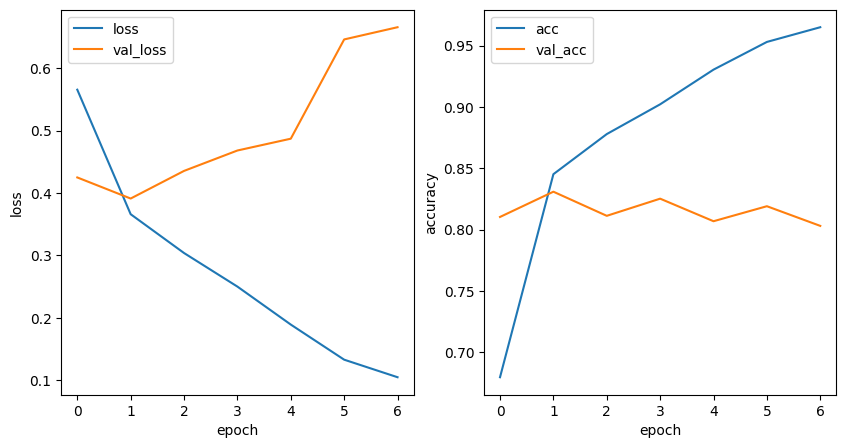

In [16]:
hist_rnn = pd.DataFrame(history_rnn.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(hist_rnn.loss, label = "loss")
plt.plot(hist_rnn.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist_rnn.accuracy, label = "acc")
plt.plot(hist_rnn.val_accuracy, label = "val_acc")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()

dane są bardzo basic, więc stosowanie złożonych super modeli w tym przypadku nie ma większego sensu
żeby spróbować poprawić można by: zwiększyć liczbę wymiarów, neuronów w warstwie rekurencyjnej i ugółem pokombinować z parametrami